- Import
- Data Grouping
- Visualization of Variables
- Define Functions
- Statistical Tests

# Import
- libraries
- warnings
- colors

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
import statsmodels.api as sm
from pylab import rcParams # This will define a fixed size for all special charts.
from statsmodels.tsa.stattools import adfuller

rcParams['figure.figsize'] = 15, 7

plt.style.use('fivethirtyeight')  #set color scheme for plt

path = r'/Users/amritambe/Desktop/Analysis_Project/Women_Empowerment/'

df = pd.read_csv(os.path.join(path, '2 Data', 'Clean_Data', '12_3_2023_WEI_GDP_LIFE.csv'), index_col='Unnamed: 0')

df.head()


,Country_Id,Country_Name,Year,GDP_Growth,Index_1971,Index_2020,Fifty_Year_Change,Region,Income_Group,Question_Category,Question,Index_Score,2020_Data_Rank,2020_1GB_Price(USD),Life_Exp,Population,GDP_Per_Cap,Avg_WEI_Score
35,1,Afghanistan,1972,0.0,210.0,305.0,95.0,South Asia,Low income,Assets,Does the law provide for the valuation of nonm...,0.0,59.0,1.55,36.09,13079460.0,739.98,6.29
36,1,Afghanistan,1972,0.0,210.0,305.0,95.0,South Asia,Low income,Assets,Do female and male surviving spouses have equa...,0.0,59.0,1.55,36.09,13079460.0,739.98,6.29
37,1,Afghanistan,1972,0.0,210.0,305.0,95.0,South Asia,Low income,Assets,Do men and women have equal ownership rights t...,20.0,59.0,1.55,36.09,13079460.0,739.98,6.29
38,1,Afghanistan,1972,0.0,210.0,305.0,95.0,South Asia,Low income,Assets,Do sons and daughters have equal rights to inh...,0.0,59.0,1.55,36.09,13079460.0,739.98,6.29
39,1,Afghanistan,1972,0.0,210.0,305.0,95.0,South Asia,Low income,Assets,Does the law grant spouses equal administrativ...,20.0,59.0,1.55,36.09,13079460.0,739.98,6.29


# _____________________________________________________ Data Grouping

# Groupby
- country_, df grouped by country, year

In [2]:
df1 = df[[
 'Country_Name',
 'Year',
 # 'Region',
 # 'Income_Group',
 # 'Question_Category',
 # 'Question',
 'Index_Score',
 'Life_Exp',
 'Population',
 'GDP_Per_Cap',
 # 'Avg_WEI_Score'
]].copy()

#groupby relevant variables
country_ = df1.groupby(['Country_Name', 'Year']) \
            .agg(['mean']) \
            .reset_index() 

country_.head()

,Country_Name,Year,Index_Score,Life_Exp,Population,GDP_Per_Cap
,,,mean,mean,mean,mean
0,Afghanistan,1972,6.0,36.09,13079460.0,739.98
1,Afghanistan,1973,6.0,36.09,13079460.0,739.98
2,Afghanistan,1974,6.0,36.09,13079460.0,739.98
3,Afghanistan,1975,6.0,36.09,13079460.0,739.98
4,Afghanistan,1976,6.0,36.09,13079460.0,739.98


In [3]:
country_.columns = country_.columns.get_level_values(0)
country_.columns

Index(['Country_Name', 'Year', 'Index_Score', 'Life_Exp', 'Population',
       'GDP_Per_Cap'],
      dtype='object')

# Groupby 
- world, df by year, lifeexp, pop, gdp, index

In [228]:
world = country_.groupby(['Year']).agg({'Life_Exp':'mean', 'Population':'sum', 
                                        'GDP_Per_Cap':'mean', 'Index_Score':'mean'})

world.head()

,Life_Exp,Population,GDP_Per_Cap,Index_Score
Year,,,,
1972,60.590211,5.458281e+09,7964.539895,10.629323
1973,60.590211,5.458281e+09,7964.539895,10.751128
1974,60.590211,5.458281e+09,7964.539895,10.952632
1975,60.590211,5.458281e+09,7964.539895,11.036842
1976,60.590211,5.458281e+09,7964.539895,11.117293


# _____________________________________________________ Visualizations

# Worldwide 
- plotting three variables worldwide from 1972-2020, plotly objects
- life, life expectancy
- gdp, gdp per capita
- index, women's empowerment index scores

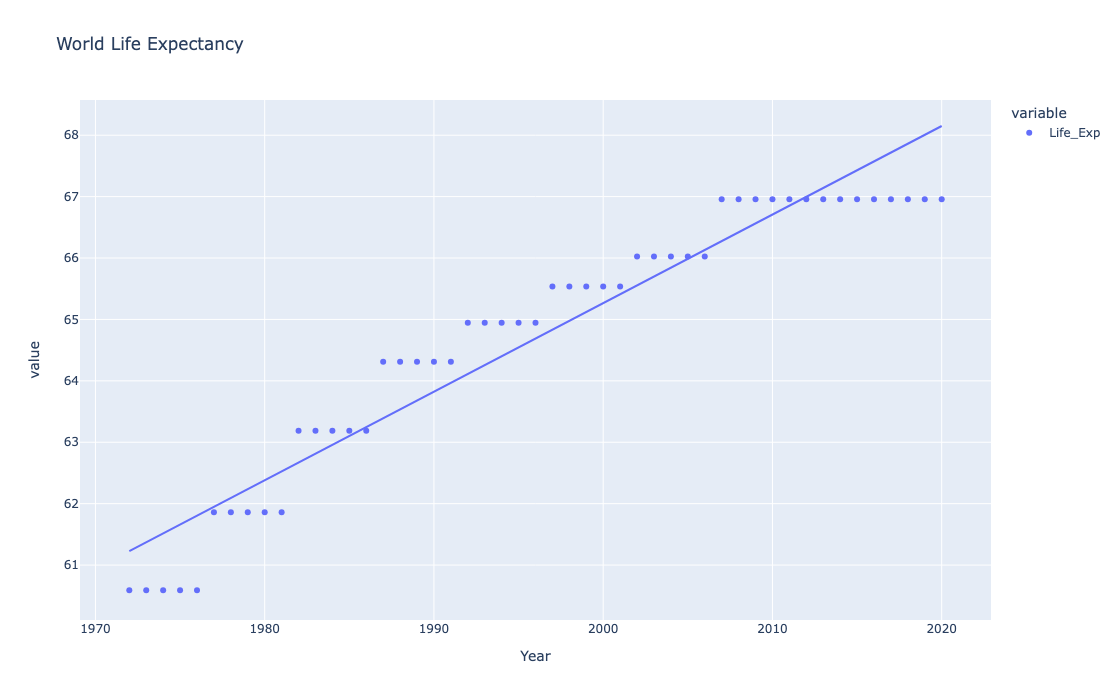

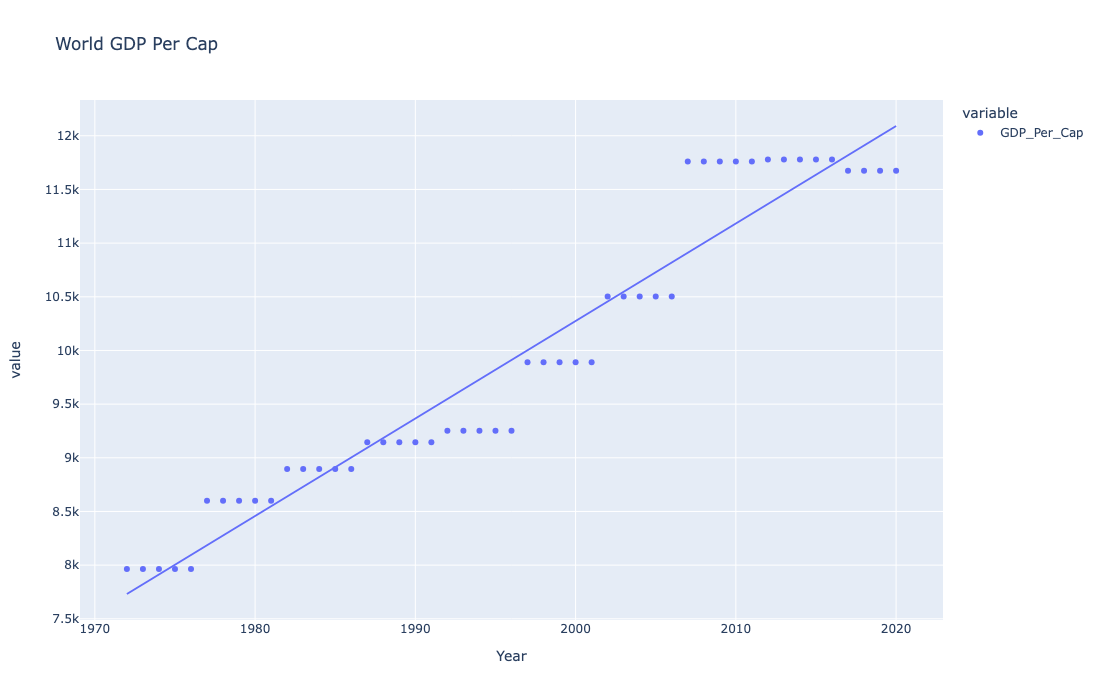

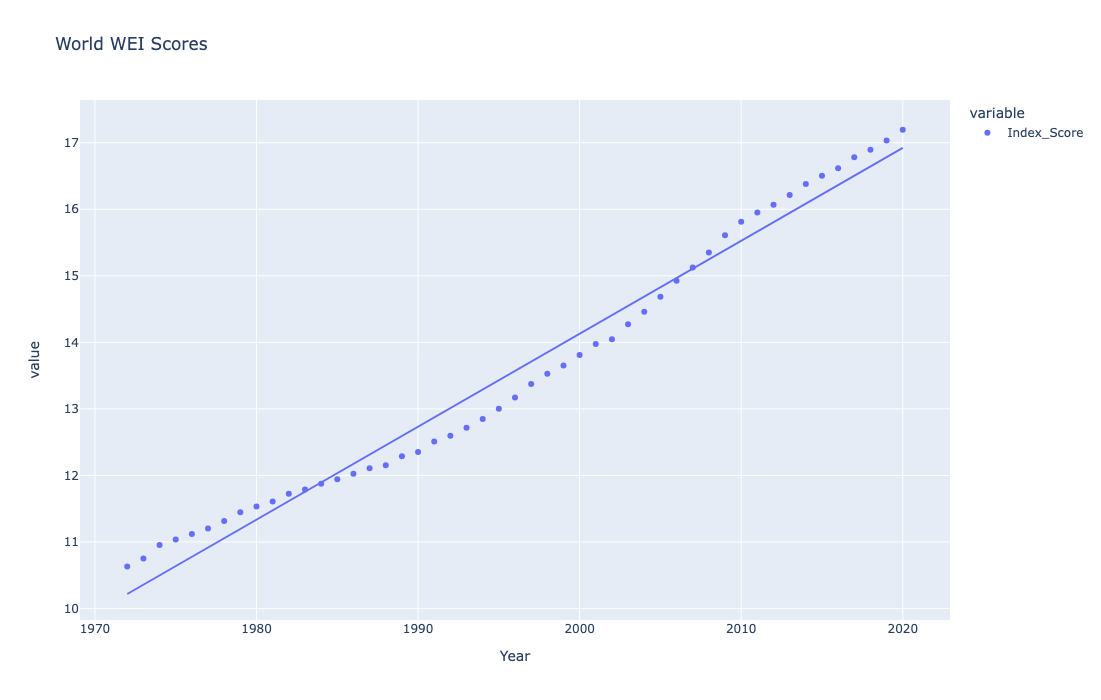

(None, None, None)

In [229]:
#plotly scatterplots life_exp
life = px.scatter(world['Life_Exp'], marginal_y=None, title='World Life Expectancy', 
                 width=700, height=700, trendline='ols')


#gdp per cap
gdp = px.scatter(world['GDP_Per_Cap'], marginal_y=None, title='World GDP Per Cap', 
                 width=700, height=700, trendline='ols')


#plotly scatterplots provide multiple charts using marginal_y or _x:
index = px.scatter(world['Index_Score'], marginal_y=None, title='World WEI Scores', 
                 width=700, height=700, trendline='ols')

life.show(), gdp.show(), index.show()

# _______________________________________________________ Functions

# Stationarity of Data
- prepare_time_series()
  - takes df, col, makes a datetime indexed df (needs 'Year' as index)
- difference()
  - differencing n number of shifts
- decomp()
  - Decomposition of df, default 'additive' model, plots chart
- dickey_fuller(),
  - Dickey Fuller Test for Stationarity vs Non-Stationarity, prints results


In [308]:
def prepare_time_series(df, col):
    """
    Prepare datetime indexed series.

    Parameters:
    - df: DataFrame with 'Year' as index
    - col: Column to make series from

    Returns:
    - time_series: DataFrame with datetime index
    """
    
    time_series = df[col].copy()
    time_series.index = pd.to_datetime(time_series.index.astype('str'))

    return time_series



#Differencing
def difference(df, n):    
    '''
    - df, series
    - n, magnitude of differences
    '''
    
    df_ = df.copy()

    for i in range(1, n + 1):
        df_diff = df_ - df_.shift(1)

    df_diff = df_diff.dropna()
    df_diff = df_diff.replace(0, 1e-8)
    return df_diff




#define decomp function
def decomp(df, n=None, log=None, log_first=True):
    '''
    plot decomposition chart for time series data

    Parameters:
    - df, dataframe, 'Year' as index
    - col, column for title
    - n, magnitude of differencing
    - log, boolean, default not log transformed
    - log_first, boolean, default true, log transform before differencing
    '''

    df = df.dropna()
    

    decomposition = sm.tsa.seasonal_decompose(df, period=1)
    
    decomposition.plot()
    
    title = f'Seasonal Decomposition'                     # Set the title dynamically 
    
    if n != None and log == None:
        title += f' | Differenced {n}x'
    
    if log != None and n == None:
        title += ' | Log Transform'
        
    if log != None and n != None and log_first:
        title += f' | Log Transformed then Differenced {n}x'

    if log != None and n != None and log_first != True:
        title += f' | Differenced {n}x then Log Transformed'

        
    title += '\n'
    
    plt.suptitle(title, x=.2, y=.96)  
    plt.show()



#define Dickey Fuller function
def dickey_fuller(df):
    '''
    Dickey Fuller statistical test for 
    Stationary vs Non-Stationary time series data

    Parameters:
    - df, dataframe
    '''

    df = df.dropna()
        
    result = adfuller(df)                                                  #run test from statsmodels
    
    test_statistic, p_value, lags, nobs, critical_values, icbest = result  # organize the results, name them
    
    df_result = pd.DataFrame({                                             # Create a DataFrame to display the results
        'Test Statistic': test_statistic,
        'p-value': p_value,
        'Number of Lags': lags,
        'Number of Observations': nobs,
        'Critical Values (1%)': critical_values['1%'],
        'Critical Values (5%)': critical_values['5%'],
        'Critical Values (10%)': critical_values['10%'],
        'IC Best': icbest
    }, index=['Value']).T                                                 #transform df
    
    print(f"{df.name} | Augmented Dickey-Fuller Test Results:")           # Display the results
    print(df_result, '\n')
                                                                          # print easy to read logic
    if p_value < 0.05:
        print(f'p_value ({p_value:.2f}) is less than 0.05')
        if test_statistic < critical_values['5%']:                  
            print(f'Test Statistic ({test_statistic:.2f}) is less than Critical threshold of 5% ({critical_values["5%"]:.2f}). \n\
    \nNull Hypothesis -rejected-, data is -stationary-\n')
        else:
            print(f'Test Statistic ({test_statistic:.2f}) is greater than Critical threshold of 5% ({critical_values["5%"]:.2f}). \n\
    \nNull Hypothesis -not- rejected, data is -non-stationary-\n')
    else:
        print(f'p_value ({p_value:.2f}) is greater than 0.05 and statistically not significant.\n\n')

# stationarity()
  - differences data
  - log transforms
  - plots decomposition
  - prints dickey fuller stats

In [260]:
##all functions:
def stationarity(df, col, n=None, log=None, log_first=True):
    
    '''
    Does decomposition, Dickey Fuller test, differencing, and logistic transformations

    Parameters:
    - df, dataframe, must be indexed with 'Year'
    - col, column to test
    - n, number of times to difference
    - log, boolean, default None, log transformation
    - log_first, boolean, default True, (log transform before differencing)
    '''

    
    time_series = prepare_time_series(df, col)                     #make datetime series
    
    #dickey fuller stats test,  decomp, and log transforms
    
    if n is None and log is None:
        decomp(time_series)                                          
        dickey_fuller(time_series)                                   
        
    elif n is not None and log is None:
        df_diff = difference(time_series, n)
        decomp(df_diff, n=n, log=None)
        dickey_fuller(df_diff)
        
    elif n is None and log is not None:
        log_df = np.log(time_series)
        decomp(log_df, n=n, log=True)
        dickey_fuller(log_df)
        
    elif n is not None and log is not None and log_first:
        log_df = np.log(time_series)
        df_diff = difference(log_df, n)
        decomp(df_diff, n=n, log=True)
        dickey_fuller(df_diff)
        
    elif n is not None and log is not None and log_first is False:
        df_diff = difference(time_series, n)
        log_df = np.log(df_diff)
        decomp(log_df, n=n, log=True, log_first=False)
        dickey_fuller(log_df)

    

# multi_stationarity()
- stationarity(), but passes a list of cols to analyze

In [261]:
def multi_stationarity(df, cols, n=None, log=None, log_first=True):
    '''
    Does decomposition, Dickey Fuller test, differencing, and logistic transformations
    for multiple columns

    Parameters:
    - df, dataframe, must be indexed with 'Year'
    - col, columns to test [list]
    - n, number of times to difference
    - log, boolean, default None, log transformation
    - log_first, boolean, default True, (log transform before differencing)
    '''

    for col in cols:
        stationarity(df, col, n=n, log=log, log_first=log_first)

# _____________________________________________________ Statistical Tests

# World Statistical Tests
- multi_stationarity()
  - takes df ('Year' as index)
  - cols (list) makes datetime series
  - n of differences
  - log transform data
  - log before or after differencing

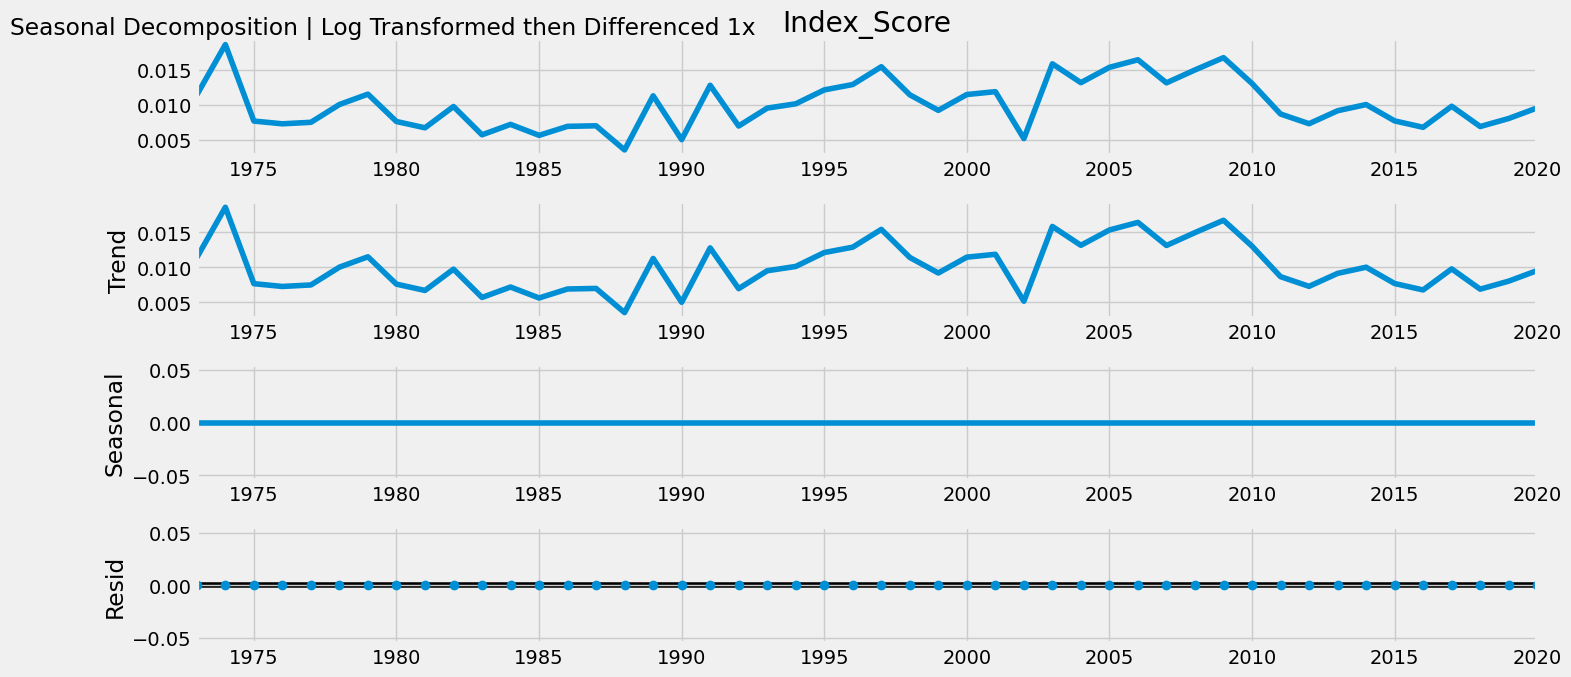

Index_Score | Augmented Dickey-Fuller Test Results:
                             Value
Test Statistic           -3.034686
p-value                   0.031780
Number of Lags            1.000000
Number of Observations   46.000000
Critical Values (1%)     -3.581258
Critical Values (5%)     -2.926785
Critical Values (10%)    -2.601541
IC Best                -323.210844 

p_value (0.03) is less than 0.05
Test Statistic (-3.03) is less than Critical threshold of 5% (-2.93). 
    
Null Hypothesis -rejected-, data is -stationary-



In [309]:
stationarity(world, 'Index_Score', n=1, log=True, log_first=True)
# stationarity(world, 'GDP_Per_Cap', n=1, log=True, log_first=True)


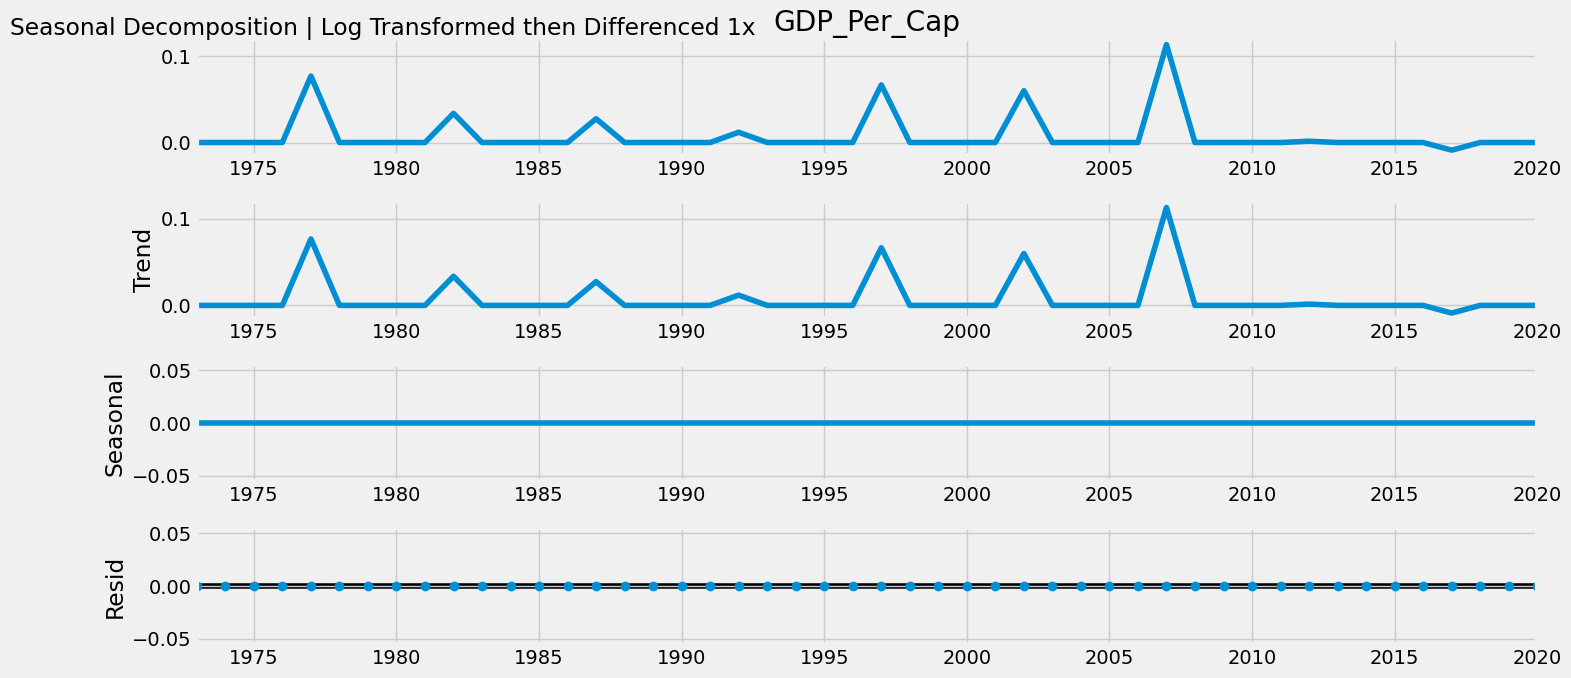

GDP_Per_Cap | Augmented Dickey-Fuller Test Results:
                             Value
Test Statistic           -2.034394
p-value                   0.271699
Number of Lags            4.000000
Number of Observations   43.000000
Critical Values (1%)     -3.592504
Critical Values (5%)     -2.931550
Critical Values (10%)    -2.604066
IC Best                -174.630951 

p_value (0.27) is greater than 0.05 and statistically not significant.




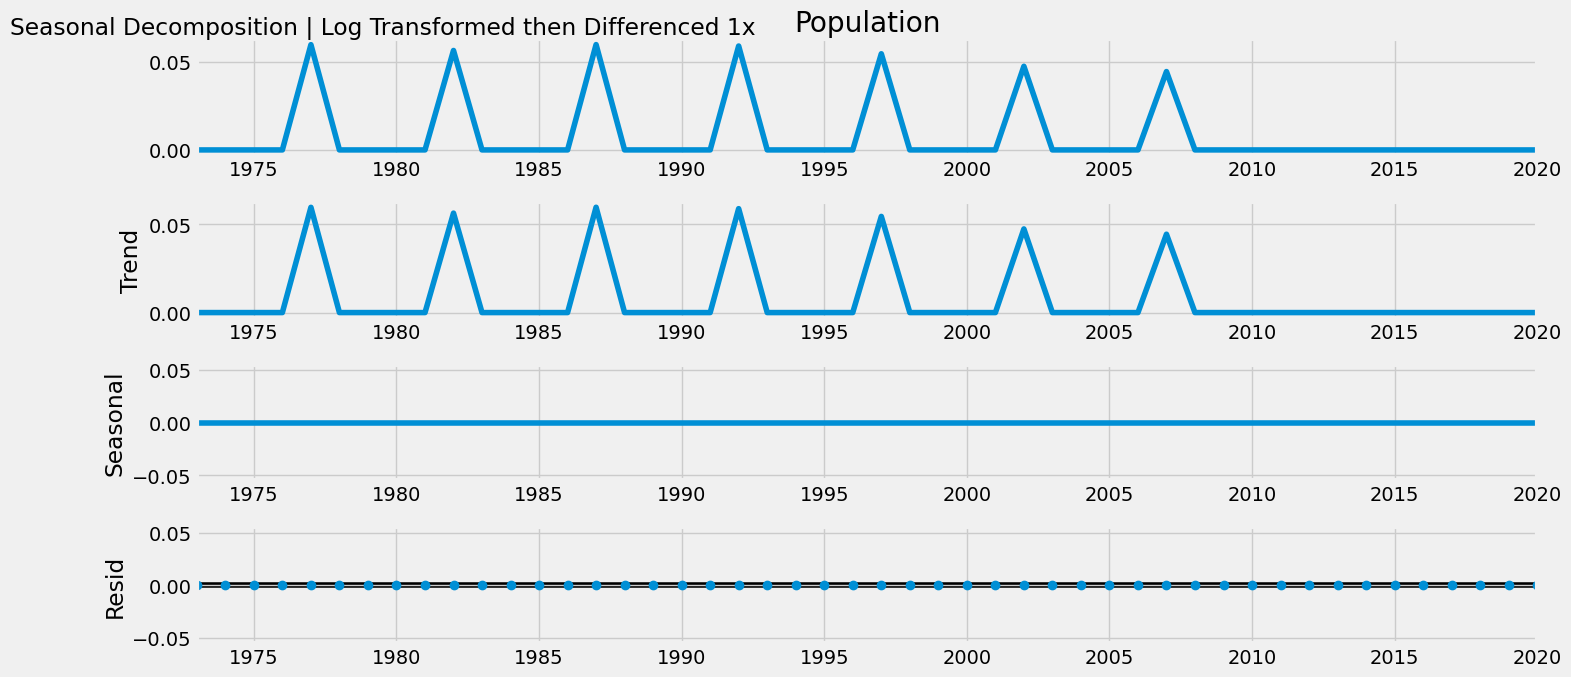

Population | Augmented Dickey-Fuller Test Results:
                             Value
Test Statistic           -0.180118
p-value                   0.940850
Number of Lags            4.000000
Number of Observations   43.000000
Critical Values (1%)     -3.592504
Critical Values (5%)     -2.931550
Critical Values (10%)    -2.604066
IC Best                -253.550307 

p_value (0.94) is greater than 0.05 and statistically not significant.




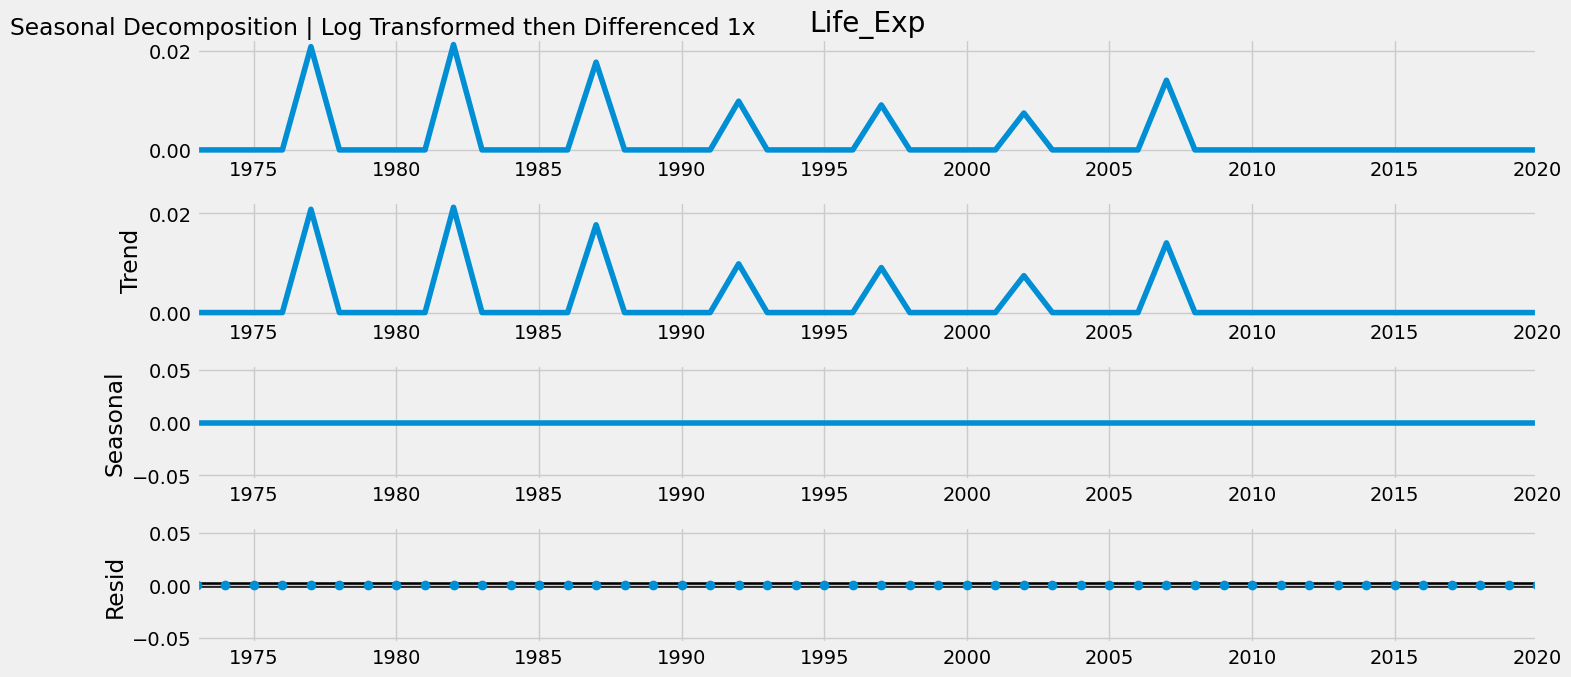

Life_Exp | Augmented Dickey-Fuller Test Results:
                             Value
Test Statistic           -1.110923
p-value                   0.710696
Number of Lags            4.000000
Number of Observations   43.000000
Critical Values (1%)     -3.592504
Critical Values (5%)     -2.931550
Critical Values (10%)    -2.604066
IC Best                -333.190100 

p_value (0.71) is greater than 0.05 and statistically not significant.




In [323]:
multi_stationarity(world, ['GDP_Per_Cap', 'Population', 'Life_Exp'], n=1, log=True, log_first=True)